<font size=5><center> Examen statistiques </center></font>
<br>

 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/TP_Examen/Examen.ipynb#Exercice-1" data-toc-modified-id="Exercice-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercice 1</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/TP_Examen/Examen.ipynb#Question-1:-Shape-de-la-dataframe-et-variance-égale-à-1" data-toc-modified-id="Question-1:-Shape-de-la-dataframe-et-variance-égale-à-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><u>Question 1:</u> <i>Shape de la dataframe et variance égale à 1</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP_Examen/Examen.ipynb#Question-2:-Visualisation-via-ACP" data-toc-modified-id="Question-2:-Visualisation-via-ACP-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><u>Question 2:</u> <i>Visualisation via ACP</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP_Examen/Examen.ipynb#Question-3:-Découpage-des-données" data-toc-modified-id="Question-3:-Découpage-des-données-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><u>Question 3:</u> <i>Découpage des données</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP_Examen/Examen.ipynb#Question-4:-Découpage-des-données" data-toc-modified-id="Question-4:-Découpage-des-données-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><u>Question 4:</u> <i>Découpage des données</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP_Examen/Examen.ipynb#Question-5:-Utiliser-LassoCV" data-toc-modified-id="Question-5:-Utiliser-LassoCV-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span><u>Question 5:</u> <i>Utiliser LassoCV</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP_Examen/Examen.ipynb#Question-6:-Proposer-et-calculer-un-estimateur" data-toc-modified-id="Question-6:-Proposer-et-calculer-un-estimateur-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span><u>Question 6:</u> <i>Proposer et calculer un estimateur</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP_Examen/Examen.ipynb#Question-7:-Coder-la-méthode" data-toc-modified-id="Question-7:-Coder-la-méthode-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span><u>Question 7:</u> <i>Coder la méthode</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP_Examen/Examen.ipynb#Question-8:-Procédure-de-validation-croisée" data-toc-modified-id="Question-8:-Procédure-de-validation-croisée-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span><u>Question 8:</u> <i>Procédure de validation croisée</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP_Examen/Examen.ipynb#Question-9:-Comparer-l'erreur-de-prédiction" data-toc-modified-id="Question-9:-Comparer-l'erreur-de-prédiction-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span><u>Question 9:</u> <i>Comparer l'erreur de prédiction</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP_Examen/Examen.ipynb#Question-10:-Reprendre-avec-Intercept-" data-toc-modified-id="Question-10:-Reprendre-avec-Intercept--1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span><u>Question 10:</u> <i>Reprendre avec Intercept </i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP_Examen/Examen.ipynb#Question-11:-Comparer-les-performances-des-méthodes-suivantes" data-toc-modified-id="Question-11:-Comparer-les-performances-des-méthodes-suivantes-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span><u>Question 11:</u> <i>Comparer les performances des méthodes suivantes</i></a></span></li></ul></li></ul></div>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import lasso_path
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from numpy.linalg import inv
import pandas as pd
import numpy as np
import warnings
import seaborn
%matplotlib inline

La question 8 a été traitée en collaboration avec Badr Ghazlane

# Exercice 1

In [2]:
from sklearn.datasets.mldata import fetch_mldata
dataset_name = 'leukemia'
data = fetch_mldata(dataset_name)
X = data.data
y = data.target
X = X.astype(float)
y = y.astype(float)

## <u>Question 1:</u> <i>Shape de la dataframe et variance égale à 1</i>

In [3]:
print("Nombre de features:", X.shape[1])
print("Nombre de lignes:", X.shape[0])

df = pd.DataFrame(X)
X_scaled = scale(X)

Nombre de features: 7129
Nombre de lignes: 72


## <u>Question 2:</u> <i>Visualisation via ACP</i>

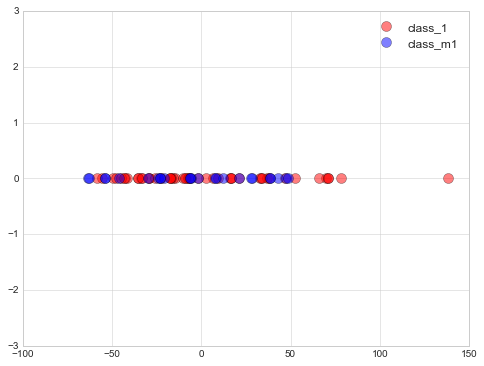

In [4]:
pca_d1 = PCA(n_components=1)
pca_d1_transf = pca_d1.fit_transform(X_scaled)

index_Class_1 = np.where(y == 1)
index_Class_m1 = np.where(y == -1)
y_grid = np.zeros(len(y))

plt.close()
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(8, 6))
plt.plot(pca_d1_transf[index_Class_1], y_grid[index_Class_1], 'o', markersize=10, color='red', alpha=0.5, label='class_1')
plt.plot(pca_d1_transf[index_Class_m1], y_grid[index_Class_m1], 'o', markersize=10, color='blue', alpha=0.5, label='class_m1')
plt.ylim([-3, 3])
plt.legend()
plt.show()

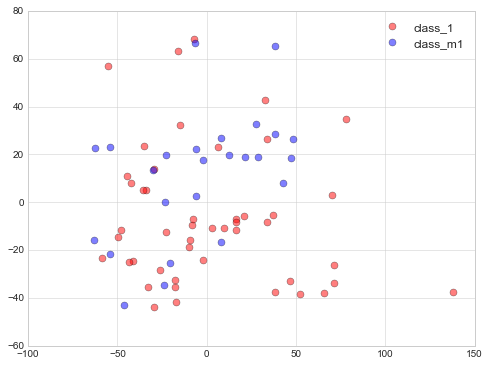

In [5]:
pca_d2 = PCA(n_components=2)
pca_d2_transf = pca_d2.fit_transform(X_scaled)


plt.close()
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(8, 6))
plt.plot(pca_d2_transf[:,0][index_Class_1], pca_d2_transf[:,1][index_Class_1], 'o', markersize=7, color='red', alpha=0.5, label='class_1')
plt.plot(pca_d2_transf[:,0][index_Class_m1], pca_d2_transf[:,1][index_Class_m1], 'o', markersize=7, color='blue', alpha=0.5, label='class_m1')
plt.legend()
plt.show()

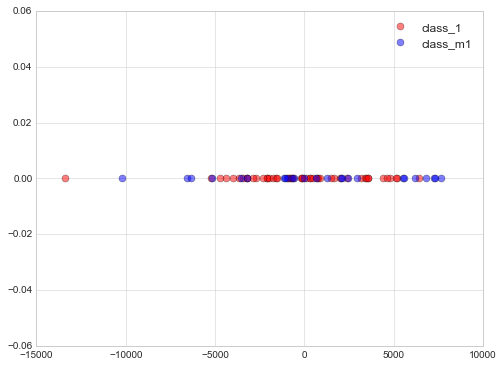

In [6]:
tsne_d1 = TSNE(n_components=1)
tsne_d1_transf = tsne_d1.fit_transform(X_scaled)


plt.close()
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(8, 6))
plt.plot(tsne_d1_transf[index_Class_1], y_grid[index_Class_1], 'o', markersize=7, color='red', alpha=0.5, label='class_1')
plt.plot(tsne_d1_transf[index_Class_m1], y_grid[index_Class_m1], 'o', markersize=7, color='blue', alpha=0.5, label='class_m1')
plt.legend()
plt.show()

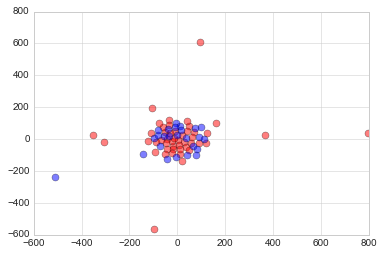

In [7]:
tsne_d2 = TSNE(n_components=2)
tsne_d2_transf = tsne_d2.fit_transform(X_scaled)

plt.plot(tsne_d2_transf[:,0][index_Class_1], tsne_d2_transf[:,1][index_Class_1], 'o', markersize=7, color='red', alpha=0.5, label='class1')
plt.plot(tsne_d2_transf[:,0][index_Class_m1], tsne_d2_transf[:,1][index_Class_m1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.show()

## <u>Question 3:</u> <i>Découpage des données</i>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

## <u>Question 4:</u> <i>Découpage des données</i>

λ' = λ / n revient à avoir notre problème initial factorisé par 1 / n. Ce qui ne change rien quand on veut minimiser selon θ.

## <u>Question 5:</u> <i>Utiliser LassoCV</i>

In [9]:
alphas = []
alphas.append(np.max(np.dot(np.transpose(X_train), y_train)) / X_scaled.shape[0]) # alpha0

def get_alpha(alpha):
    return alphas[0]*10 ** ((-2*alpha)/16)

for i in range(1, 17):
    alphas.append(get_alpha(i))

lasso_cv = linear_model.LassoCV(alphas=alphas, cv=4, fit_intercept=False)
clf = lasso_cv.fit(X_train, y_train)
y_pred = clf.predict(X_test)

risque = sum(y_pred - y_test)**2 / len(y_pred)
erreurLCV = np.mean(y_pred - y_test)**2
print("Valeur du risque:", risque)

Valeur du risque: 3.52280172135


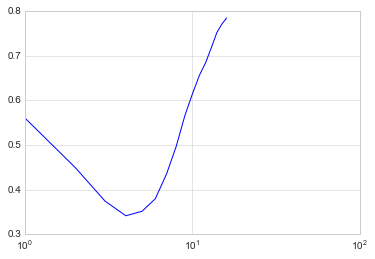

In [10]:
plt.semilogx(clf.mse_path_.mean(axis=1))
plt.show()

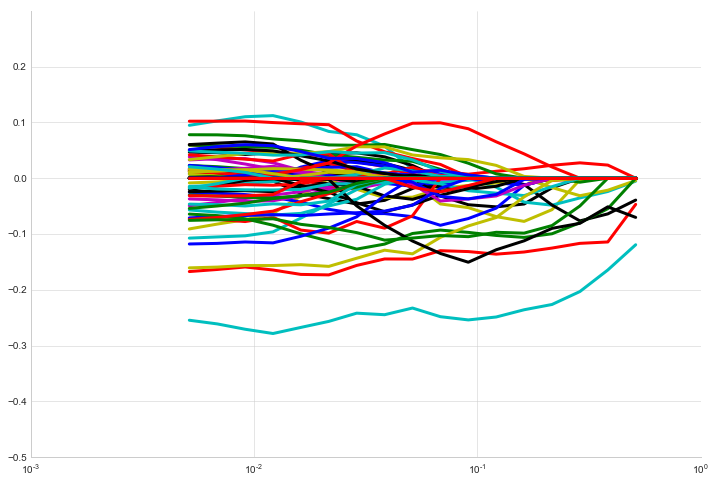

In [11]:
_, theta_lasso, _ = lasso_path(X_train, y_train, alphas=alphas, fit_intercept=False,
                               return_models=False)

# plot lasso path
fig1 = plt.figure(figsize=(12, 8))
plt.semilogx(alphas, np.transpose(theta_lasso), linewidth=3)
plt.ylim([-0.5, 0.3])
seaborn.despine()
plt.show()

## <u>Question 6:</u> <i>Proposer et calculer un estimateur</i>

La valeur de l'estimateur sans biais est: 
estimateur = [ 1 / n-rg(X) ] * (y_pred - y)^2

Notre problème c'est que le rang de X vaut n dans notre cas et donc on ne peut pas diviser par 0.<br>
On garde alors seulement:</br>
estimateur = [ 1 / n ] * (y_pred - y)^2

In [12]:
alpha0 = np.max(max(abs(np.dot(X_train.T,y_train))))/X_train.shape[0]

VecteurBruit = (y_test - y_pred)
np.std(VecteurBruit)
print("l'ecart type est: ", np.std(VecteurBruit))

l'ecart type est:  0.531394972791


## <u>Question 7:</u> <i>Coder la méthode</i>

In [13]:
def LassoSeuille(X, Y, Lambda, Tho, fit_inter = False):
    theta_lasso_seuille=0
    lasso_cv = linear_model.Lasso(alpha=Lambda,fit_intercept=fit_inter).fit(X, Y)
    s = []
    coef_seuil = []
    for j in range(X.shape[1]):
        if abs(lasso_cv.coef_[j]) > Tho:
            s.append(j)
    if len(s)>0:
        new_X = X[:,s]
        theta_lasso_seuille =  linear_model.LinearRegression(fit_intercept=fit_inter).fit(new_X, Y)
    else:
        print('Tho est trop grand aucune features retenues')
    return (theta_lasso_seuille,s)

## <u>Question 8:</u> <i>Procédure de validation croisée</i>

In [15]:
def get_dict_cv_grid(X, Y, Tho, alphas, k_folds = 4, fit_inter = False):
    kf = KFold(k_folds)
    mylist = list(kf.split(X_scaled, y))

    T = [0.0001, 0.0002]
    d = {"Erreur": [], "Alpha": [], "Tho": []}

    for i in np.arange(0,k_folds):
        train, test = mylist[i]
        X_trainCV = X_scaled[train]
        y_trainCV = y[train]
        
        X_testCV = X_scaled[test]
        y_testCV = y[test]
        
        for a in alphas:
            for t in T:
                x, S = LassoSeuille(X = X_trainCV, Y = y_trainCV, Lambda = a, Tho = t, fit_inter = False)
                d["Erreur"].append(np.mean(x.predict(np.take(X_testCV, S, axis=1)) - y_testCV)**2)
                d["Alpha"].append(a)
                d["Tho"].append(t)
            
    return d

T = [0.001, 0.002]
dict_grid = get_dict_cv_grid(X_scaled, y, T, alphas, k_folds = 4)
df_grid = pd.DataFrame(dict_grid).sort_values(by="Erreur")
df_grid.head()

/Users/clementtailleur/Documents/Telecom/Statistics/Py3_Statistics/lib/python3.6/site-packages/scipy/linalg/basic.py:884: RuntimeWarning:

internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.

/Users/clementtailleur/Documents/Telecom/Statistics/Py3_Statistics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



,Alpha,Erreur,Tho
35,0.512225,0.003368,0.0002
34,0.512225,0.003368,0.0001
37,0.384115,0.016333,0.0002
36,0.384115,0.016333,0.0001
38,0.288045,0.065448,0.0001


## <u>Question 9:</u> <i>Comparer l'erreur de prédiction</i>

In [16]:
theta_lr =  linear_model.LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred_lr = theta_lr.predict(X_test)
print("Error: ", np.mean(y_pred_lr - y_test)**2)

Error:  2.15111111111


Erreur min Lasso Seuille: 0.003368 <br>
Erreur LassoCV: 3   --- (Question 5)<br>
Erreur estimation moindres carrées: 2.1511 

## <u>Question 10:</u> <i>Reprendre avec Intercept </i>

In [17]:
theta_lr =  linear_model.LinearRegression(fit_intercept=True).fit(X_train, y_train)
y_pred_lr = theta_lr.predict(X_test)
print("Error: ", np.mean(y_pred_lr - y_test)**2)

Error:  0.000888333888441


In [18]:
lasso_cv = linear_model.LassoCV(alphas=alphas, cv=4, fit_intercept=True)
clf = lasso_cv.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Error: ", np.mean(y_pred - y_test)**2)

Error:  0.00706207314981


In [19]:
T = [0.001, 0.002]
dict_grid = get_dict_cv_grid(X_scaled, y, T, alphas, k_folds = 4, fit_inter=True)
df_grid = pd.DataFrame(dict_grid).sort_values(by="Erreur")
df_grid.head()

/Users/clementtailleur/Documents/Telecom/Statistics/Py3_Statistics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



,Alpha,Erreur,Tho
35,0.512225,0.003368,0.0002
34,0.512225,0.003368,0.0001
37,0.384115,0.016333,0.0002
36,0.384115,0.016333,0.0001
38,0.288045,0.065448,0.0001


## <u>Question 11:</u> <i>Comparer les performances des méthodes suivantes</i>

In [25]:
lasso_cv = linear_model.LassoCV(alphas=alphas, cv=4, fit_intercept=False)
clf = lasso_cv.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix(y_test, np.sign(y_pred))

array([[5, 0],
       [1, 9]])

La matrice de confusion permet de nous rendre compte des égalités entre les y prédits et les vrais y.